<a href="https://colab.research.google.com/github/erika0915/25-machine-learning/blob/main/lab5/HA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Assignment 5

5. PCA & k-NN

## After finishing writing the code for each problem, submit your ipynb file (i.e., this file) to Cybercampus by **12/8 Saturday 23:59**

### Submitters are as follows.
 *Note that hands-on assignments can be done collaboratively (**up to 2 students**)*

    Name: 최수희
    Student ID: 2271104



---


## 5. PCA and k-NN with MNIST


---



Load the dataset


*   source: https://www.kaggle.com/oddrationale/mnist-in-csv



In [1]:
import pandas as pd

df_train = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_train.csv')
df_test = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/mnist/mnist_test.csv')

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

Overview the dataset

In [2]:
df_train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np

X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:,1:])
y_test = np.array(df_test['label'])

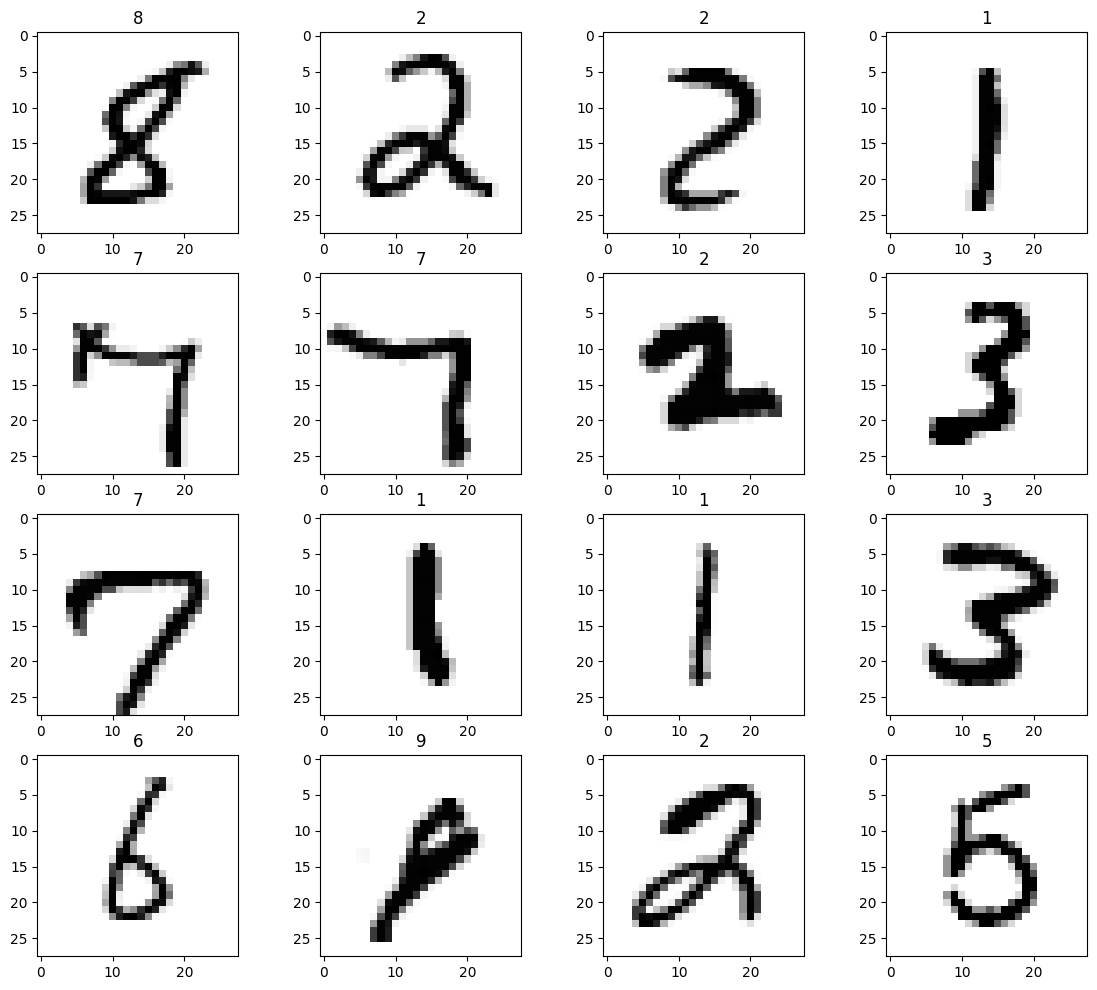

In [5]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, 60000), k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_train[n].reshape(28, 28),
               cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.show()

TO-DO:


1.   Use k-NN to classifiy the MNIST dataset and report the accuracy and time to elapse for the classification

  *   Use scikit-learn library if you'd like
  *   Use k=10
  *   Train:Test = 75:25

2. Let's use PCA + k-NN to reduce the dimension and GridSearchCV to select the optimal number of principal components and k in k-NN.
*   To use PCA + k-NN together, use the following pipe as the esimater of GridSearchCV.

    *   pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

*   Use the following parameter to find the optimal number of principal components and k

  *   parameters = {
    'pca__n_components' : [2, 5, 10],
    'clf__n_neighbors' : [5, 10, 15]
}

*   Use 5 fold cross valiation in GridSearchCV

3. Report the best accuracy and parameters

4. Using the best estimator with the best parameters, re-evaluate the testing set and measure the time to elapse.

5. Discuss whether the PCA improves the efficiency as well as effectiveness of the k-NN classifier



#### 1. k-NN 분류  

In [7]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# k-NN 분류기 설정 (k=10)
k = 10
knn_clf = KNeighborsClassifier(n_neighbors=k)

start_fit_time = time.time()
print(f"k-NN (k={k}) 모델 학습 시작...")
knn_clf.fit(X_train, y_train)
end_fit_time = time.time()
fit_time = end_fit_time - start_fit_time
print("모델 학습 완료.")

# 모델 평가 및 시간 측정
start_score_time = time.time()
print("테스트 데이터로 예측 및 정확도 계산 시작...")
accuracy = knn_clf.score(X_test, y_test)
end_score_time = time.time()
score_time = end_score_time - start_score_time
print("정확도 계산 완료.")

# 결과 출력
print("\n" + "="*50)
print(f"** 일반 k-NN (k={k}) 분류 결과 **")
print("="*50)
print(f"| 학습에 걸린 시간 (Fitting Time): {fit_time:.4f} 초")
print(f"| 예측 및 평가에 걸린 시간 (Scoring Time): {score_time:.4f} 초")
print("-" * 50)
print(f"| 총 소요 시간: {fit_time + score_time:.4f} 초")
print(f"| 테스트 정확도 (Test Accuracy): {accuracy*100:.2f} %")
print("="*50)

k-NN (k=10) 모델 학습 시작...
모델 학습 완료.
테스트 데이터로 예측 및 정확도 계산 시작...
정확도 계산 완료.

** 일반 k-NN (k=10) 분류 결과 **
| 학습에 걸린 시간 (Fitting Time): 0.2381 초
| 예측 및 평가에 걸린 시간 (Scoring Time): 46.7226 초
--------------------------------------------------
| 총 소요 시간: 46.9607 초
| 테스트 정확도 (Test Accuracy): 96.65 %


#### 2. PCA + k-NN 파이프라인과 GridSearchCV 최적화


In [8]:
import time
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# PCA로 차원 축소 -> KNeighborsClassifier로 분류
pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

# GridSearchCV에 사용할 하이퍼파라미터 정의
# pca__n_components: PCA의 주성분 개수 (2, 5, 10)
# clf__n_neighbors: k-NN의 k 값 (5, 10, 15)
parameters = {
    'pca__n_components': [2, 5, 10],
    'clf__n_neighbors': [5, 10, 15]
}

# GridSearchCV 설정 및 실행
# estimator: 위에서 정의한 pipe
# param_grid: 탐색할 파라미터 그리드
# cv: 5-겹 교차 검증
# n_jobs: -1은 사용 가능한 모든 코어를 사용하여 병렬 처리 (속도 향상)
# verbose: 진행 상황 메시지 출력 (2는 상세 출력)
print("GridSearchCV를 통한 PCA + k-NN 모델 최적화 시작...")
grid_search = GridSearchCV(estimator=pipe,
                           param_grid=parameters,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# GridSearchCV 학습 (X_train, y_train으로 교차 검증 수행)
start_grid_search_time = time.time()
grid_search.fit(X_train, y_train)
end_grid_search_time = time.time()
grid_search_time = end_grid_search_time - start_grid_search_time
print("GridSearchCV 완료.")

print("\n" + "="*50)
print(f"** GridSearchCV 총 소요 시간: {grid_search_time:.4f} 초 **")
print("="*50)

GridSearchCV를 통한 PCA + k-NN 모델 최적화 시작...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
GridSearchCV 완료.

** GridSearchCV 총 소요 시간: 134.4335 초 **


#### 3. 최적 정확도 및 파라미터 보고

In [9]:
# 최적의 파라미터와 정확도 추출
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# 결과 출력
print("\n" + "="*50)
print("** TO-DO 3: 최적 정확도 및 파라미터 **")
print("="*50)
print(f"| 최적의 PCA 주성분 개수 (n_components): {best_params['pca__n_components']}")
print(f"| 최적의 k-NN neighbors (k): {best_params['clf__n_neighbors']}")
print("-" * 50)
print(f"| 최적 교차 검증 정확도 (Best CV Accuracy): {best_score*100:.4f} %")
print("="*50)

# 이 결과를 바탕으로 다음 단계에서 사용할 변수를 설정
best_n_components = best_params['pca__n_components']
best_k = best_params['clf__n_neighbors']


** TO-DO 3: 최적 정확도 및 파라미터 **
| 최적의 PCA 주성분 개수 (n_components): 10
| 최적의 k-NN neighbors (k): 5
--------------------------------------------------
| 최적 교차 검증 정확도 (Best CV Accuracy): 92.8183 %


#### 4. 최적 모델로 테스트셋 재평가 및 시간 측정

In [10]:
# 최적의 모델 추출
best_estimator = grid_search.best_estimator_

# 테스트 데이터로 예측 및 시간 측정
start_test_score_time = time.time()
print("\n최적 모델로 테스트 데이터 예측 및 정확도 계산 시작...")
final_accuracy = best_estimator.score(X_test, y_test)
end_test_score_time = time.time()
final_score_time = end_test_score_time - start_test_score_time
print("정확도 계산 완료.")

# 결과 출력
print("\n" + "="*50)
print(f"** TO-DO 4: 최적 PCA + k-NN 최종 평가 (n={best_n_components}, k={best_k}) **")
print("="*50)
print(f"| 테스트 예측 및 평가에 걸린 시간 (Scoring Time): {final_score_time:.4f} 초")
print("-" * 50)
print(f"| 최종 테스트 정확도 (Final Test Accuracy): {final_accuracy*100:.4f} %")
print("="*50)


최적 모델로 테스트 데이터 예측 및 정확도 계산 시작...
정확도 계산 완료.

** TO-DO 4: 최적 PCA + k-NN 최종 평가 (n=10, k=5) **
| 테스트 예측 및 평가에 걸린 시간 (Scoring Time): 3.5303 초
--------------------------------------------------
| 최종 테스트 정확도 (Final Test Accuracy): 92.7600 %


#### 5. PCA의 효과에 대한 논의
5-1. 효율성 개선 여부

극적으로 개선되었다. PCA를 적용한 후, 예측 시간은 46.72초에서 3.53초로 크게 단축되었다. 이는 약 13배 빠른 속도이다. k-NN 알고리즘은 예측 시 데이터의 모든 차원에 대해 거리를 계산해야 한다. PCA를 통해 데이터의 차원을 784차원에서 10차원으로 약 78배 축소했기 때문에, 거리 계산량이 현저히 줄어들어 모델의 실행 효율성이 극적으로 향상되었다.

<br>

5-2. 유효성 개선 여부

유효성(정확도)는 하락했다. PCA + k-NN의 최종 테스트 정확도는 92.76%로, 일반 k-NN의 정확도 96.65% 보다 약 3.89%p 하락했다. PCA는 데이터의 분산을 가장 잘 설명하는 10개의 주성분만 남겼다. 이는 784차원 데이터의 정보 손실을 의미하며, 특히 k-NN과 같이 거리 기반으로 작동하는 알고리즘은 이 손실된 미세한 정보를 이용하지 못해 분류 성능이 떨어졌다. 이 결과는 주성분 10개가 MNIST 데이터의 복잡한 형태를 정확히 분류하기에는 너무 낮은 차원이었음을 시사한다.

<br>

5-3. 최종 논의
PCA는 k-NN 분류기의 효율성 측면에서 압도적인 개선을 가져왔다. 그러나 차원을 너무 급격하게 축소한 결과, 성능의 유효성이 유의미하게 하락하는 트레이드오프가 발생했다.

실제 머신러닝 환경에서는 다음과 같이 결론을 내릴 수 있다.
1. 정확도 우선 : 만약 96.65%의 정확도가 필수적이라면, 일반 k-NN을 선택해야 한다.
2. 효율성 우선 : 만약 빠른 예측 속도가 중요하고, 92.76%의 정확도로도 충분하다면, PCA + k-NN 모델이 훨씬 실용적인 선택이 된다.

따라서, PCA는 처리 속도를 극대화하는 데는 성공했지만, 최적 파라미터 탐색 범위가 너무 좁았거나 차원 축소의 정도가 너무 강해 원본 모델의 정확도를 뛰어넘지는 못했다고 결론지을 수 있다.


